# Homework 2

**Due Date**: 3/2/25 by 8pm on Canvas

In this homework assignment, you are going to create a friend finder based on musical preferences. The idea is that we can interpret our dataset as a social network of users. People that have similar musical tastes should be "closer" in the network.

An unlabeled dataset has already been generated for you with 5,000 entries. You will need to use unsupervised learning to find clusters and use them as pseudo-labels for the dataset. Then, use this information with a supervised learning technique to train a model and use this so our users can find new friends that have similar tastes.

You can work on this by yourself or with one other person in the class. If you are working as a group, only one person needs to submit the assignment on Canvas, but make sure to write who you worked with as a submission comment!

## Installing Libraries

Machine learning in Python has a plethora of popularly used libraries. We can install these library packages within the Jupyter Notebooks itself. Just run the cell below and it should download and install them to your computer. You only need to run this cell one time. After the package has been installed, feel free to change the cell type below from "Code" to "Raw" so it doesn't run this again.

In [1]:
import sys
!{'"' + sys.executable + '"'} -m pip install matplotlib
!{'"' + sys.executable + '"'} -m pip install numpy
!{'"' + sys.executable + '"'} -m pip install scikit-learn

## Imports

Let's begin by importing all the necessary library modules for this assignment.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import csv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Dataset

At the crux of any machine learning application is a dataset. Our first objective is to load in an existing dataset and do some basic processing on it to make it usable by our ML algorithms.

### Loading the Dataset

As part of the assignment, you have been provided a CSV (comma-separated values) file representing the dataset. We will need to load this CSV file into our notebook and store its contents into a list. Note, the code below assumes that the CSV file is in the same directory as this notebook. If you stored the file in a separate location, you'll need to adjust the file path below.

In [5]:
# load the dataset from the CSV file
filepath = 'music-preferences.csv'
raw_dataset = []
with open(filepath, 'r', encoding='utf-8', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    raw_dataset = list(reader)

### Processing

With the dataset now loaded in, we will need to perform some processing. Namely, we need to do the following in this order:

1. Extract the first row out of the dataset, as this contains the column headers. Store this in a variable called `header_row`.
2. Extract the first column out the dataset, as this contains the names of the users. Store this in a variable called `user_names`.
3. Convert all the values in the dataset into integers.
4. Transform the dataset from a nested list into a proper numpy array. Store this numpy array as the variable `X`.
5. Scale the dataset using the `StandardScaler` from scikit-learn. Create a variable called `scaler` for this purpose (we'll need this for later too).

In [9]:
# TODO: extract the first row
header_row = raw_dataset[0]

# TODO: extract the first column
user_names = []
for row in raw_dataset[1:]:
    user_names.append(row[0])

# TODO: convert all values to integers
data_values = []
for row in raw_dataset[1:]:
    int_values = []
    for value in row[1:]:
        int_values.append(int(value))
    data_values.append(int_values)

# TODO: convert to a numpy array
X = np.array(data_values)

# TODO: scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## $k$-Means Clustering

With the dataset now ready, let's use the $k$-Means Clustering algorithm to find potential clusters.

### Finding a $k$ Value

Of course, before we can use $k$-MC, we have to find a good $k$ value to use. Use the elbow method we discussed in class to find a suitable $k$ value. Use mathplotlib to visualize these results.

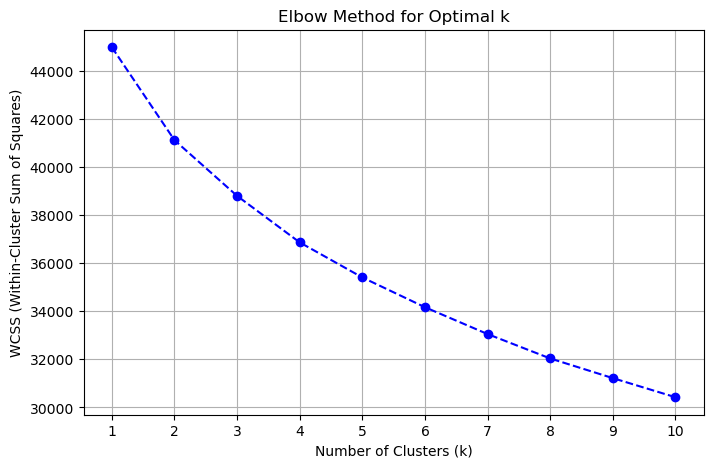

In [11]:
# TODO: use elbow method to find suitable k value
sums = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sums.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sums, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

### Train and Determine Clusters

With a good $k$ value in mind, you can now use $k$-MC on the dataset `X`. Use the `KMeans` function from scikit-learn to train a model on our dataset. After training, extract the cluster information and store this as the variable `y`, as we will be treating them as pseudo-labels.

In [15]:
# TODO: train k-MC on the dataset
optimal_k = 5

# TODO: use clusters to form labels
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

#pseudo-labels
y = kmeans.labels_

print("Cluster Labels (y):", y)
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Labels (y): [4 3 0 ... 0 3 4]
Cluster Centers:
 [[ 0.71718645  0.06413601 -0.02995732  0.08327689  0.45966321 -0.85496785
   0.69861611 -0.19834029 -0.12139257]
 [-0.83749714  0.55244859  0.88828478  0.11926512 -0.10318847  0.13937477
   0.1587002  -0.08466655  0.20908337]
 [-0.76975285 -0.19813569 -0.75683949 -0.1331896  -0.14958777 -0.54714625
  -0.59292522 -0.19289805 -0.10276861]
 [ 0.80899134 -0.19340317  0.42890885  0.14078956 -0.22937663  0.19446478
  -0.8958805   0.21541047  0.1497386 ]
 [ 0.14305188 -0.232139   -0.57501458 -0.20646342  0.07113419  0.9369833
   0.68214941  0.22874146 -0.15526903]]


## $k$-Nearest Neighbor

Now that we have "labels" for the dataset, let's use the $k$-Nearest Neigbor algorithm to create an ML model.

### Splitting the Dataset

Before we can train our ML model, we need to split our dataset into three partitions: training, validation, and testing. Once again, use the `train_test_split` function from scikit-learn to create an 80/10/10 split of the original dataset.

In [17]:
# TODO: split into 3 subsets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 4000 samples
Validation set: 500 samples
Test set: 500 samples


### Train and Predict with a $k$-NN Model

With our dataset split, we can now use the training set to create a $k$-NN model. Use the `KNeighborsClassifier` function from scikit-learn for this purpose. You need to also use this trained $k$-NN model to predict the labels for the validation set.

In [19]:
# TODO: apply k-NN to training set
k_val = 5
knn = KNeighborsClassifier(n_neighbors=k_val)
knn.fit(X_train, y_train)

# TODO: predict the labels for the validation set
y_val_pred = knn.predict(X_val)

### Metrics

Next, we need to compute various metrics on our model to determine if it did well. Use the appropriate scikit-learn functions to compute the following metrics:

- accuracy rate
- error rate
- precision score
- recall score
- F1-score
- confusion matrix (it is recommended to use the `ConfusionMatrixDisplay` function for this)

Use these results to adjust the hyperparameters of $k$-NN as necessary. Your model needs to achieve at least an 80% for accuracy, precision, recall, and F1.

Accuracy: 0.8180
Error Rate: 0.1820
Precision: 0.8189
Recall: 0.8180
F1-Score: 0.8178


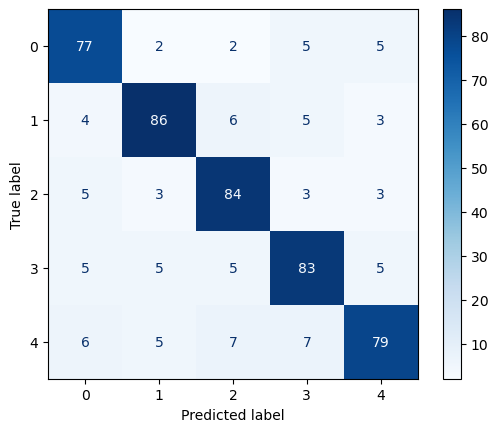

In [23]:
# TODO: compute metrics using the validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_val, y_val_pred)
error_rate = 1 - accuracy
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

# Display the confusion matrix
cm_display.plot(cmap='Blues')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

## User Testing

With our model trained, let's have some fun! The code cell below will allow a user to interact with our model and find some new friends 😉🎶🎵

Note, the code below assumes you used `kmeans_model` as the variable name for the $k$-MC model and `knn_model` for the $k$-NN model. If you used different names, you'll need to adjust the code accordingly.

In [29]:
# get user input
print('Welcome to my Music Friend Finder!')
print('For each of the following music genres, please enter a score between 0 (hate) and 5 (love):')
user_scores = []
for genre in header_row[1:]:
    user_num = -1
    while user_num not in range(0, 6):
        user_num = int(input('\t' + genre[0].upper() + genre[1:] + ': '))
    user_scores.append(user_num)


# scale their data
new_data = np.array(user_scores).reshape(1, -1)
new_data = scaler.transform(new_data)


# predict their cluster using k-MC
predicted_cluster = kmeans.predict(new_data)
print()
print(f'Based on our model, we believe you belong to cluster {predicted_cluster}')
print()


# display their neighbors
num_friends = 3
neigh_dist, neigh_ind = knn.kneighbors(X=new_data, n_neighbors=num_friends, return_distance=True)
print(f'The following are your top {num_friends} music friends!')
for n in range(1, num_friends + 1):
    friend_features = X[neigh_ind[0, n - 1]]
    print('\t', n, '. ', user_names[neigh_ind[0, n - 1]], sep='')
    print('\t\t', scaler.inverse_transform(friend_features.reshape(1, -1)))
    print(f'\t\t(distance: {neigh_dist[0, n - 1]})')

Welcome to my Music Friend Finder!
For each of the following music genres, please enter a score between 0 (hate) and 5 (love):


	Rock:  0
	Pop:  0
	Hip hop:  1
	Country:  2
	Jazz:  4
	Classical:  5
	Electronic:  4
	Metal:  3
	Latin:  2



Based on our model, we believe you belong to cluster [4]

The following are your top 3 music friends!
	1. Cameron Powell
		 [[9.27864321 5.90952316 7.5882487  5.92003931 4.20984456 7.59963326
  5.92981255 4.24961677 9.31187799]]
		(distance: 3.7390044441896437)
	2. Caroline Lee
		 [[10.97215402  5.90952316  5.89403246  4.21041965  5.91488912  2.5014
   9.32042509  9.36586708  2.489     ]]
		(distance: 4.10272036849564)
	3. Ethan Brown
		 [[ 7.58513241  7.60818474  9.28246493  4.21041965  4.20984456 10.99845543
  11.01573137  9.36586708  5.90043899]]
		(distance: 4.334207969128874)


## Final Test

As a final test, let's see how well your trained model does on the test set. <span style="color: red;">You should only do this ONCE!</span> **Do not use the results from here to go back and adjust your model anymore.**

You just need to copy-and-paste your code from the relevant sections in the notebook and change out the validation set for the test set. Namely, you will need to predict the labels for the test set and then compute the metrics.

In [ ]:
# TODO: predict the labels for the test set
y_test_pred = knn.predict(X_test)

# TODO: compute metrics using the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error_rate = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)
test_cm_display = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=np.unique(y))

# Display the confusion matrix
test_cm_display.plot(cmap='Blues')

# Print the metrics for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")